# Task-02 
The **Exploratory Data Analysis** of Super Market Data.

By:- **Ukant Jadia**
<br> GitHub Profile Link: [https://github.com/ukantjadia/TSF-GRIP-Tasks](https://github.com/ukantjadia/TSF-GRIP-Tasks)

# Setting Up Environment

## Loading some key Libraries

In [2]:
## Import key Projects

## for data handling
import pandas as pd
import numpy as np 
from skimpy import skim
from scipy.stats import skew
from scipy.stats import kurtosis as krt

# for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
from IPython.display import display

## For warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Collecting the Data

In [3]:
## Reading the data and its Information
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Analysising Data

### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Observation 
- we could see that the features and its data type, along with Null count
- We have zero null-count in our dataset
- DataType table below

| Data Type |Features|
|:----------:|:-----------:|
|int64(Continuous) | Postal Code, Quantity | 
|float64(Continuous) | Sales, Discount, Profit|
|object(Categorical) | Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category |

### Handling the Data

In [12]:
## Data Cleaning/ Wrangling 

## 1. Unique values in features with object datatype
obj_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

unique_values = lambda  :[ print("Unique count in ",obj_cols[i]," is ",len(df[obj_cols[i]].unique())," and values: ",df[obj_cols[i]].unique(),". \n") for i in range(len(obj_cols))]

unique_values()
print("Unique values in City is :" , len(df['City'].unique()))
print("Unique values in State is :" , len(df['State'].unique()))

Unique count in  Ship Mode  is  4  and values:  ['Second Class' 'Standard Class' 'First Class' 'Same Day'] . 

Unique count in  Segment  is  3  and values:  ['Consumer' 'Corporate' 'Home Office'] . 

Unique count in  Country  is  1  and values:  ['United States'] . 

Unique count in  City  is  531  and values:  ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'We

#### Observation
- As Store Manager 
  - We have orders from __**1 country, 531 cites,with 631 postal code and 49 states  with all 4 region, with 3 main category and 17 sub-category to 3 main segments placed with 4 different ship modes**__.

### Stastical Analysis of Data

In [10]:
## Summary of Statics

## Using skimpy for quick view of summary 
skim(df)

df.describe().round(2).T

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│          Data Summary                Data Types                                           │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                    │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                    │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                    │
│ │ Number of rows    │ 9994   │ │ object      │ 8     │                                    │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                    │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                    │
│                                └─────────────┴───────┘                                    │
│                                          number                                           │
│ ┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃          ┃ missing ┃ complete     ┃ mean ┃ sd   ┃ p0    ┃ p25 ┃ p75 ┃ p100  ┃ hist   ┃  │
│ ┃          ┃         ┃ rate         ┃      ┃      ┃       ┃     ┃     ┃       ┃        ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Sales    │       0 │            1 │  230 │  620 │  0.44 │  17 │ 210 │ 23000 │   █    │  │
│ │ Quantity │       0 │            1 │  3.8 │  2.2 │     1 │   2 │   5 │    14 │  █▃▂▁  │  │
│ │ Discount │       0 │            1 │ 0.16 │ 0.21 │     0 │   0 │ 0.2 │   0.8 │ █▆   ▁ │  │
│ │ Profit   │       0 │            1 │   29 │  230 │ -6600 │ 1.7 │  29 │  8400 │    █   │  │
│ └──────────┴─────────┴──────────────┴──────┴──────┴───────┴─────┴─────┴───────┴────────┘  │
╰─────────────────────────────────────────── End ───────────────────────────────────────────╯

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.0,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.0,0.16,0.21,0.00,0.00,0.20,0.20,0.80
Profit,9994.0,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98


#### Observation From Stastical Analysis
- From above summary
    - Sales and Profit contains more outiler than the outiler of Discount and Quantity.
    - There is no null values are present in given data.

### Checking For Null Values

In [ ]:
## Checking Null vales in dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.title('Null values')
plt.show()
print('Null Values in Dataset\n',df.isnull().sum()/(len(df))*100)

#### Observation
- From above heatmap we can see that there is zero null values in dataset.

### Dropping some Attribute

In [7]:
## Dropping the Postal Code attribute 
df = df.drop(['Postal Code'],axis=1)
df.sample(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6497,Standard Class,Home Office,United States,Louisville,Kentucky,South,Furniture,Furnishings,20.940,3,0.0,6.0726
2835,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,10.890,1,0.0,2.8314
2680,Standard Class,Home Office,United States,Jackson,Michigan,Central,Technology,Accessories,619.950,5,0.0,111.5910
2927,Standard Class,Consumer,United States,Apple Valley,Minnesota,Central,Office Supplies,Art,8.640,3,0.0,2.5056
5316,First Class,Home Office,United States,Knoxville,Tennessee,South,Furniture,Furnishings,11.808,2,0.2,1.3284


### Calculating The Skewness and Kurtosis in Data

In [5]:
## Calculating skewness and kurtosis of Continuous feature(Sales,Quantity,Discount,Profit)
skewness = []
kurtos = []

[skewness.append(skew(df[num_cols[i]],bias=True)) for i in range(len(num_cols))]
[kurtos.append(krt(df[num_cols[i]],bias=True)) for i in range(len(num_cols))]
ziped = list(zip(num_cols,skewness,kurtos))
df_stat = pd.DataFrame(ziped,columns=['Features','Skewness','Kurtosis'])
df_stat

,Features,Skewness,Kurtosis
0,Quantity,1.278353,1.990293
1,Sales,12.970805,305.158427
2,Discount,1.684042,2.407740
3,Profit,7.560297,396.989229


#### Observation
- As basic stats we know
    - if skewness = 0 -> Normal ditribution
    - if skewness > 0 -> Left tail distribution
    - if skewness < 0 -> Right tail distribution

    and

    - if Kurtosis = 3 -> Normal distribution
    - if kurtosis < 3 -> then it's called playkurtic(heavy-tailed)
    - if kurtosis > 3 -> it's called leptokurtic and it tries to produce more outlier rather than normal distribution.

- So, in comparison to other continuour variable `Sales` have **Huge Outlier** and **Heavly Tailed**. 
- **Quatity** is also contain  the hugre **outlier**.

### Univariate Analysis

Column is  Sales
Skew :  12.97


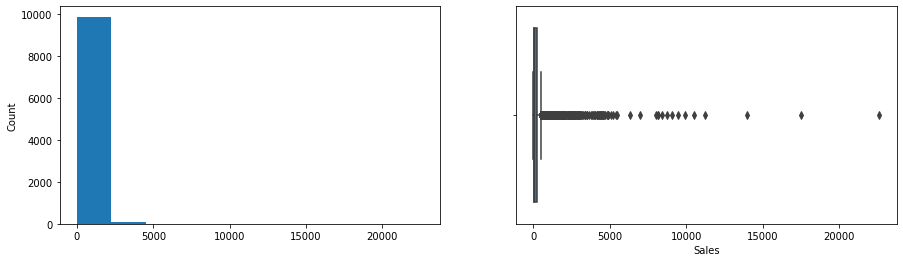

Column is  Quantity
Skew :  1.28


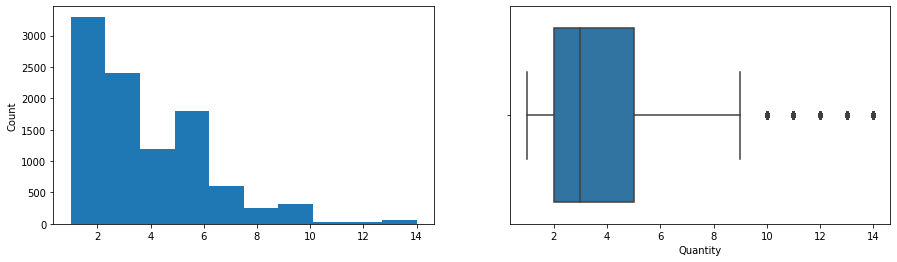

Column is  Discount
Skew :  1.68


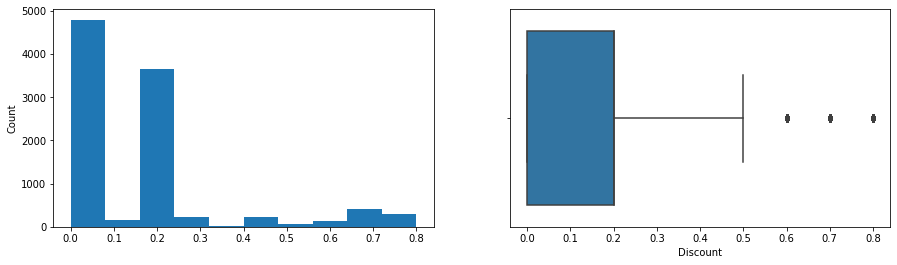

Column is  Profit
Skew :  7.56


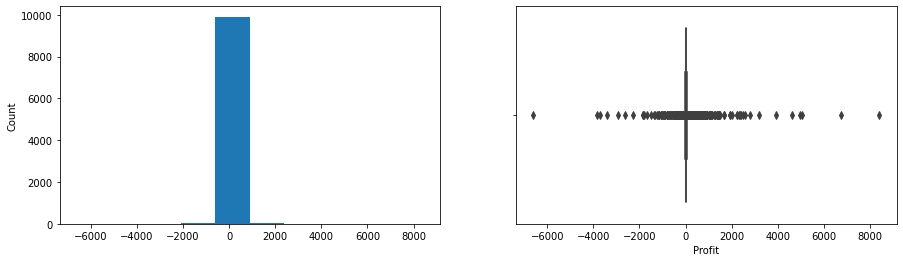

In [15]:
## Drawing the comparison plots between numberical data
for col in num_cols:
    print("Column is ",col)
    print('Skew : ',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

#### Observation of Univariate Analysis
- Sales, Discount, Quantity are highly right skwed.

### Skewness with Distribution plot

<Figure size 720x720 with 0 Axes>

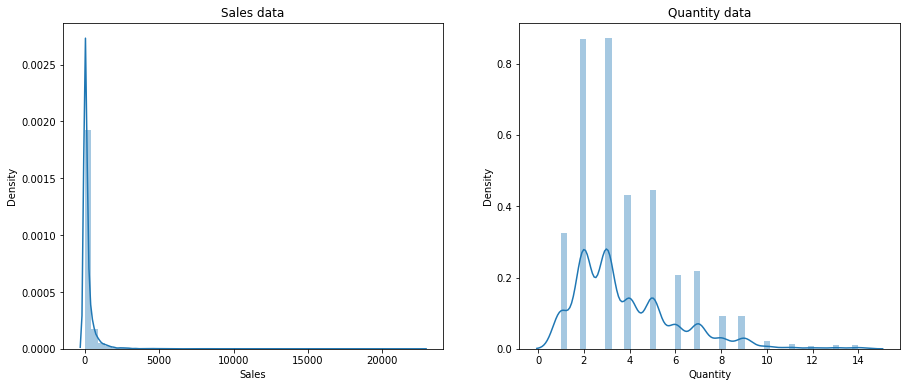

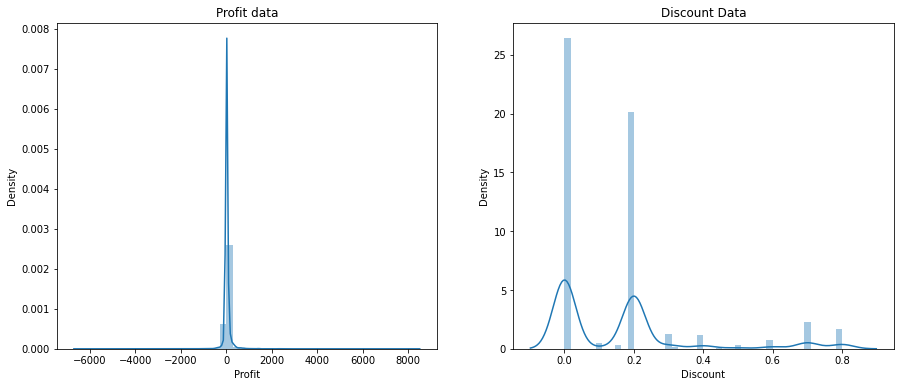

In [6]:
## Univariate Analysis
## For understanding single variable 
## Now we are doing the univariate analysis of our continous data

plt.figure(figsize=(10,10))
fig, ax = plt.subplots(1,2,figsize=(15,6))
fig, ax1 = plt.subplots(1,2,figsize=(15,6))

sns.distplot(df['Sales'],ax=ax[0])
ax[0].title.set_text("Sales data")
sns.distplot(df['Quantity'],ax=ax[1])
ax[1].title.set_text("Quantity data")
sns.distplot(df['Profit'],ax=ax1[0])
ax1[0].title.set_text("Profit data")
sns.distplot(df['Discount'],ax=ax1[1])
ax1[1].title.set_text("Discount Data")

plt.show()

#### Observation
From above visualization we can say that,
- We are having high sales of value less than 5000. 
- The average of `Quantity` is 3-4. It means in most of the order we have 3 Quantity of product.
-`Profit` is not very high for most of the product, and we can say `Profit` and `Discount` is related to each other.(the peak in both graph at low values only).
- We are having `1.0-1.5` as our average of discount data.


### Univariate Analysis of Categorical Data

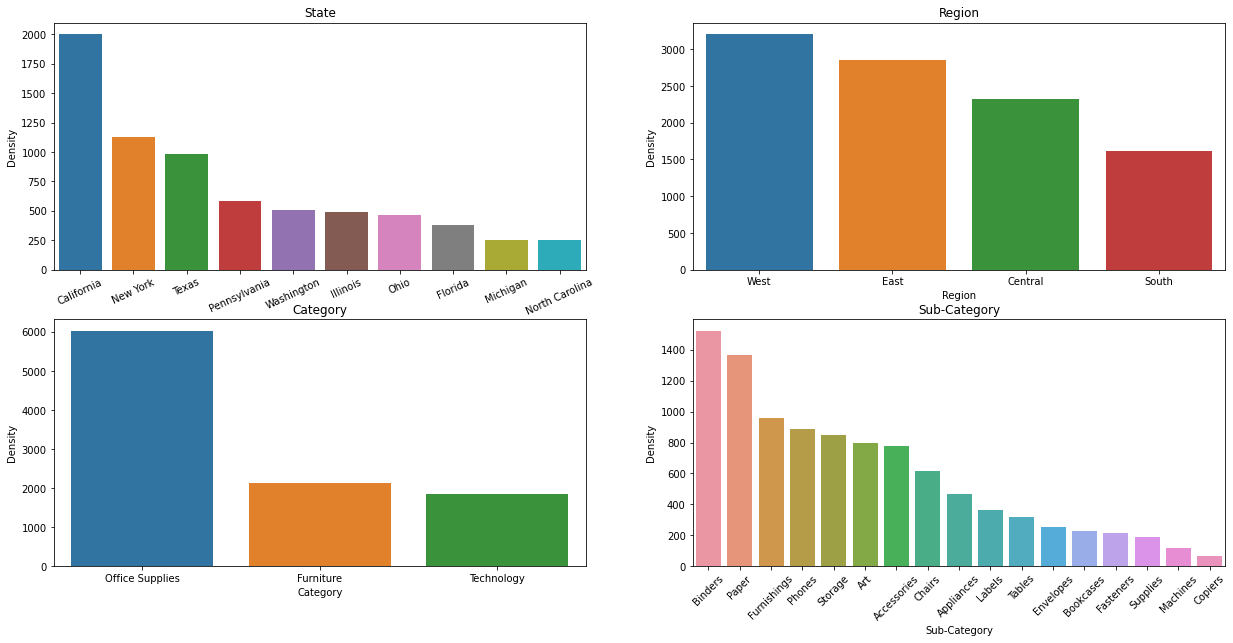

In [7]:
## Univariate analysis 
## Doing univariate analysis for categorical variable
fig, ax = plt.subplots(2,2,figsize=(21,10)) 

# Region
sns.barplot(x = df['Region'].value_counts().index,y = df['Region'].value_counts(),data=df,ax=ax[0,1])
ax[0,1].set_xlabel('Region')
ax[0,1].set_ylabel('Density')
ax[0,1].set_title('Region')
# Quantity
sns.barplot(x = df['State'].value_counts().head(10).index,y = df['State'].value_counts().head(10),ax=ax[0,0])
ax[0,0].set_xlabel('State')
ax[0,0].set_ylabel('Density')
ax[0,0].tick_params(axis='x', labelrotation=25)
ax[0,0].set_title('State')
# Discount
sns.barplot(x = df['Sub-Category'].value_counts().index,y = df['Sub-Category'].value_counts(),ax=ax[1,1])
ax[1,1].set_xlabel('Sub-Category')
ax[1,1].set_ylabel('Density')
ax[1,1].tick_params(axis='x', labelrotation=45)
# plt.xticks(rotation=45)
ax[1,1].set_title('Sub-Category')
# Country 
sns.barplot(x = df['Category'].value_counts().index , y = df['Category'].value_counts(),ax=ax[1,0])
ax[1,0].set_xlabel('Category')
ax[1,0].set_ylabel('Density')
ax[1,0].set_title('Category')

plt.show()

#### Observation of univariate analysis of categorical data
- The major orders are of office supplies
- region is west, city is california 
- so, we need to focus more on the major regions and product

### Doing bivariate analysis

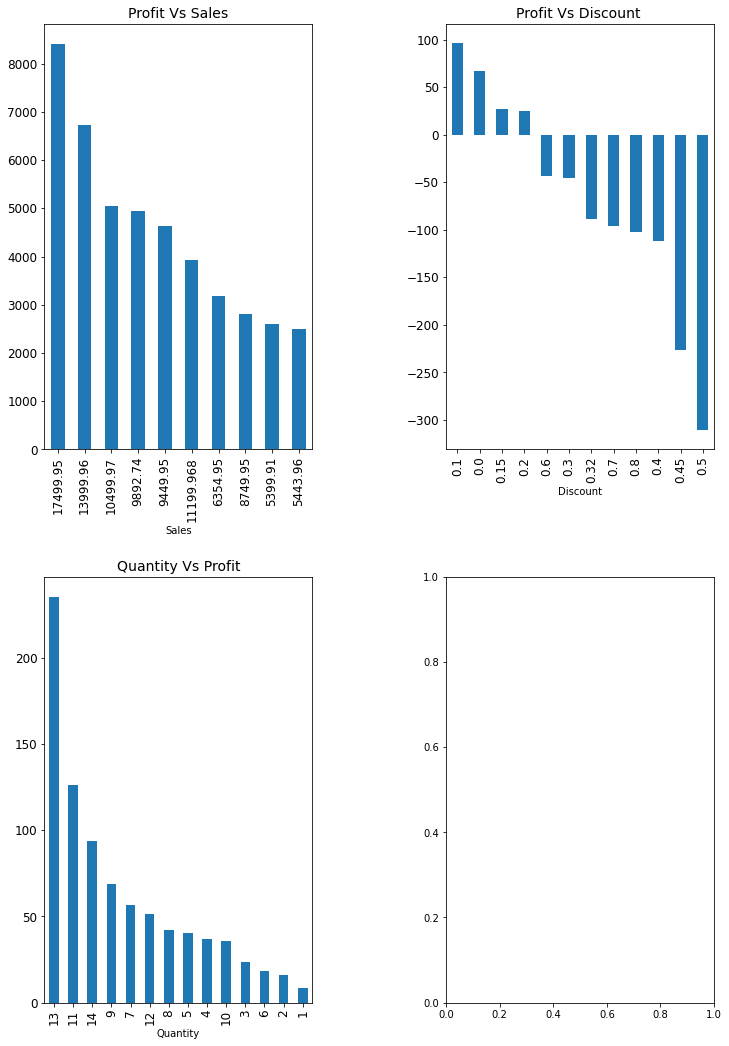

In [39]:
## Doing bivariate analysis Analysis for two or more variable in combination

fig, ax = plt.subplots(2,2,figsize=(12,18))
df.groupby('Sales')['Profit'].mean().sort_values(ascending=False).head(10).plot.bar(fontsize=12,ax=ax[0,0])
ax[0][0].set_title("Profit Vs Sales",fontsize=14)
df.groupby('Discount')['Profit'].mean().sort_values(ascending=False).plot.bar(fontsize=12,ax=ax[0,1])
ax[0][1].set_title("Profit Vs Discount ",fontsize=14)
df.groupby('Quantity')['Profit'].mean().sort_values(ascending=False).plot.bar(fontsize=12,ax=ax[1,0])
ax[1][0].set_title("Quantity Vs Profit",fontsize=14)

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.5)
plt.show()

#### Observation of bivariate analysis

### Multivariate Analysis

In [ ]:
# Corr in half traingle
corr_df = df.corr()
np.tril(np.ones(corr_df.shape)).astype(np.bool)
corr_df_lower = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

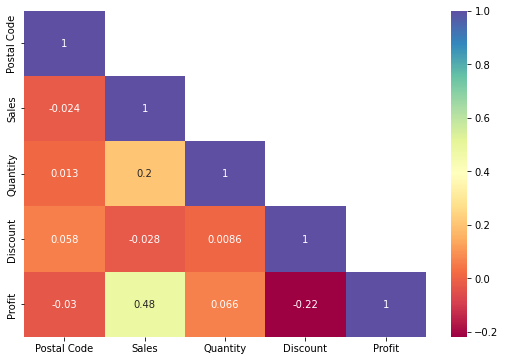

In [ ]:
## Correlation Heatmap for relation ship among features
plt.figure(figsize=(9,6))
color=sns.color_palette('Spectral',as_cmap=True)
sns.heatmap(corr_df_lower,annot=True,cmap=color)
plt.show()

#### Observation
- Postal Code is just a geological code, So there is no relation of it with any other feature
- From above graph we have following observation:
    - `Discount` <-> `Profit`  and `Sales` <-> `Discount` both having the negative relation to each other.
    - `Quantity` <-> `Profit` has the **Positive** relation, it means the more quantity in order, the more profit we have. and this is the similar case between the `Sales` <-> `Profit` and `Quatity` <-> `Discount` also.
    - `Sales` <-> `Quantity` also has the **Positive** relation, means the more ordered quantity, the higher rate of selling.

## Conclusion

- For more sell
    - add more discount on products quantity rage from 3-5.
    - add more discount on the office and furniture category.
    - Focus more on the West, East region and California state.
    - 

- To reduce the loss
    - keep the discount on product up to 2.00 only

# Thank You 
## For notebook pdf [ukantjadia.me/tsf/task-03.pdf](ukantjadia.me/tsf/task-03.pdf)